In [292]:
# This notebook is about making wordcloud of tweets using python

In [ ]:
import tweepy
import pandas as pd

In [14]:
consumer_key = "Enter your consumer key" 
consumer_secret = "Enter your consumer key secret"
access_token = "Enter your access token"
access_token_secret = "Enter your access token secret"

In [15]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [16]:
def keyword_to_csv(keyword,recent): 
    try:
        tweets = tweepy.Cursor(api.search,q=keyword).items(recent)
        tweets_list = [[tweet.text] for tweet in tweets]
        df = pd.DataFrame(tweets_list,columns=['Text'])
        df.to_csv('{}.csv'.format(keyword), sep=',', index = False)
    except BaseException as e:
        print('failed on_status,',str(e))
        time.sleep(3)

In [17]:
keyword = '#spacex'+ "-filter:retweets"
recent  = 3000
keyword_to_csv(keyword, recent)

In [26]:
df = pd.read_csv("./#spacex-filter:retweets.csv")
pd.options.display.max_colwidth = 200
df.head()

,Text
0,SpaceX will destroy one of its rockets in the pursuit of safety this weekend #SpaceX https://t.co/naViha9ymX
1,The 🌚 is in space 😏. So the sky was just the beginning of the year 🥳#Astrophotography #space #SpaceX #NASA… https://t.co/WaQ1Mhh954
2,DAY 26 @elonmusk @Tesla @BillGates I'm tagging you guys because I view you as people who are constantly pushing the… https://t.co/Q7HTfmKlLK
3,@elonmusk Can you please name all the brave space crews that colonize Mars as Musketeers?! PLEASE?! #SpaceX #ElonMusk #musketeersformars
4,La #NASA y #SpaceX enviarán al espacio diminutos calamares luminiscentes y osos de agua .-\nLos científicos van a es… https://t.co/UK3Nb1plld


In [278]:
df.shape

(3000, 1)

In [279]:
re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#']
combined_re = re.compile( '|'.join( re_list) )

In [280]:
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

In [281]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()

In [282]:
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [283]:

print("Cleaning the tweets...\n")
cleaned_tweets = []
for i in range(0,3000):
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have been processed".format(i+1,3000))                                                                  
    cleaned_tweets.append(cleaning_tweets((df.Text[i])))

Cleaning the tweets...

Tweets 100 of 3000 have been processed
Tweets 200 of 3000 have been processed
Tweets 300 of 3000 have been processed
Tweets 400 of 3000 have been processed
Tweets 500 of 3000 have been processed
Tweets 600 of 3000 have been processed
Tweets 700 of 3000 have been processed
Tweets 800 of 3000 have been processed
Tweets 900 of 3000 have been processed
Tweets 1000 of 3000 have been processed
Tweets 1100 of 3000 have been processed
Tweets 1200 of 3000 have been processed
Tweets 1300 of 3000 have been processed
Tweets 1400 of 3000 have been processed
Tweets 1500 of 3000 have been processed
Tweets 1600 of 3000 have been processed
Tweets 1700 of 3000 have been processed
Tweets 1800 of 3000 have been processed
Tweets 1900 of 3000 have been processed
Tweets 2000 of 3000 have been processed
Tweets 2100 of 3000 have been processed
Tweets 2200 of 3000 have been processed
Tweets 2300 of 3000 have been processed
Tweets 2400 of 3000 have been processed
Tweets 2500 of 3000 have 

In [284]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')

In [285]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["elonmusk","elon musk","elon","musk","spacex"])

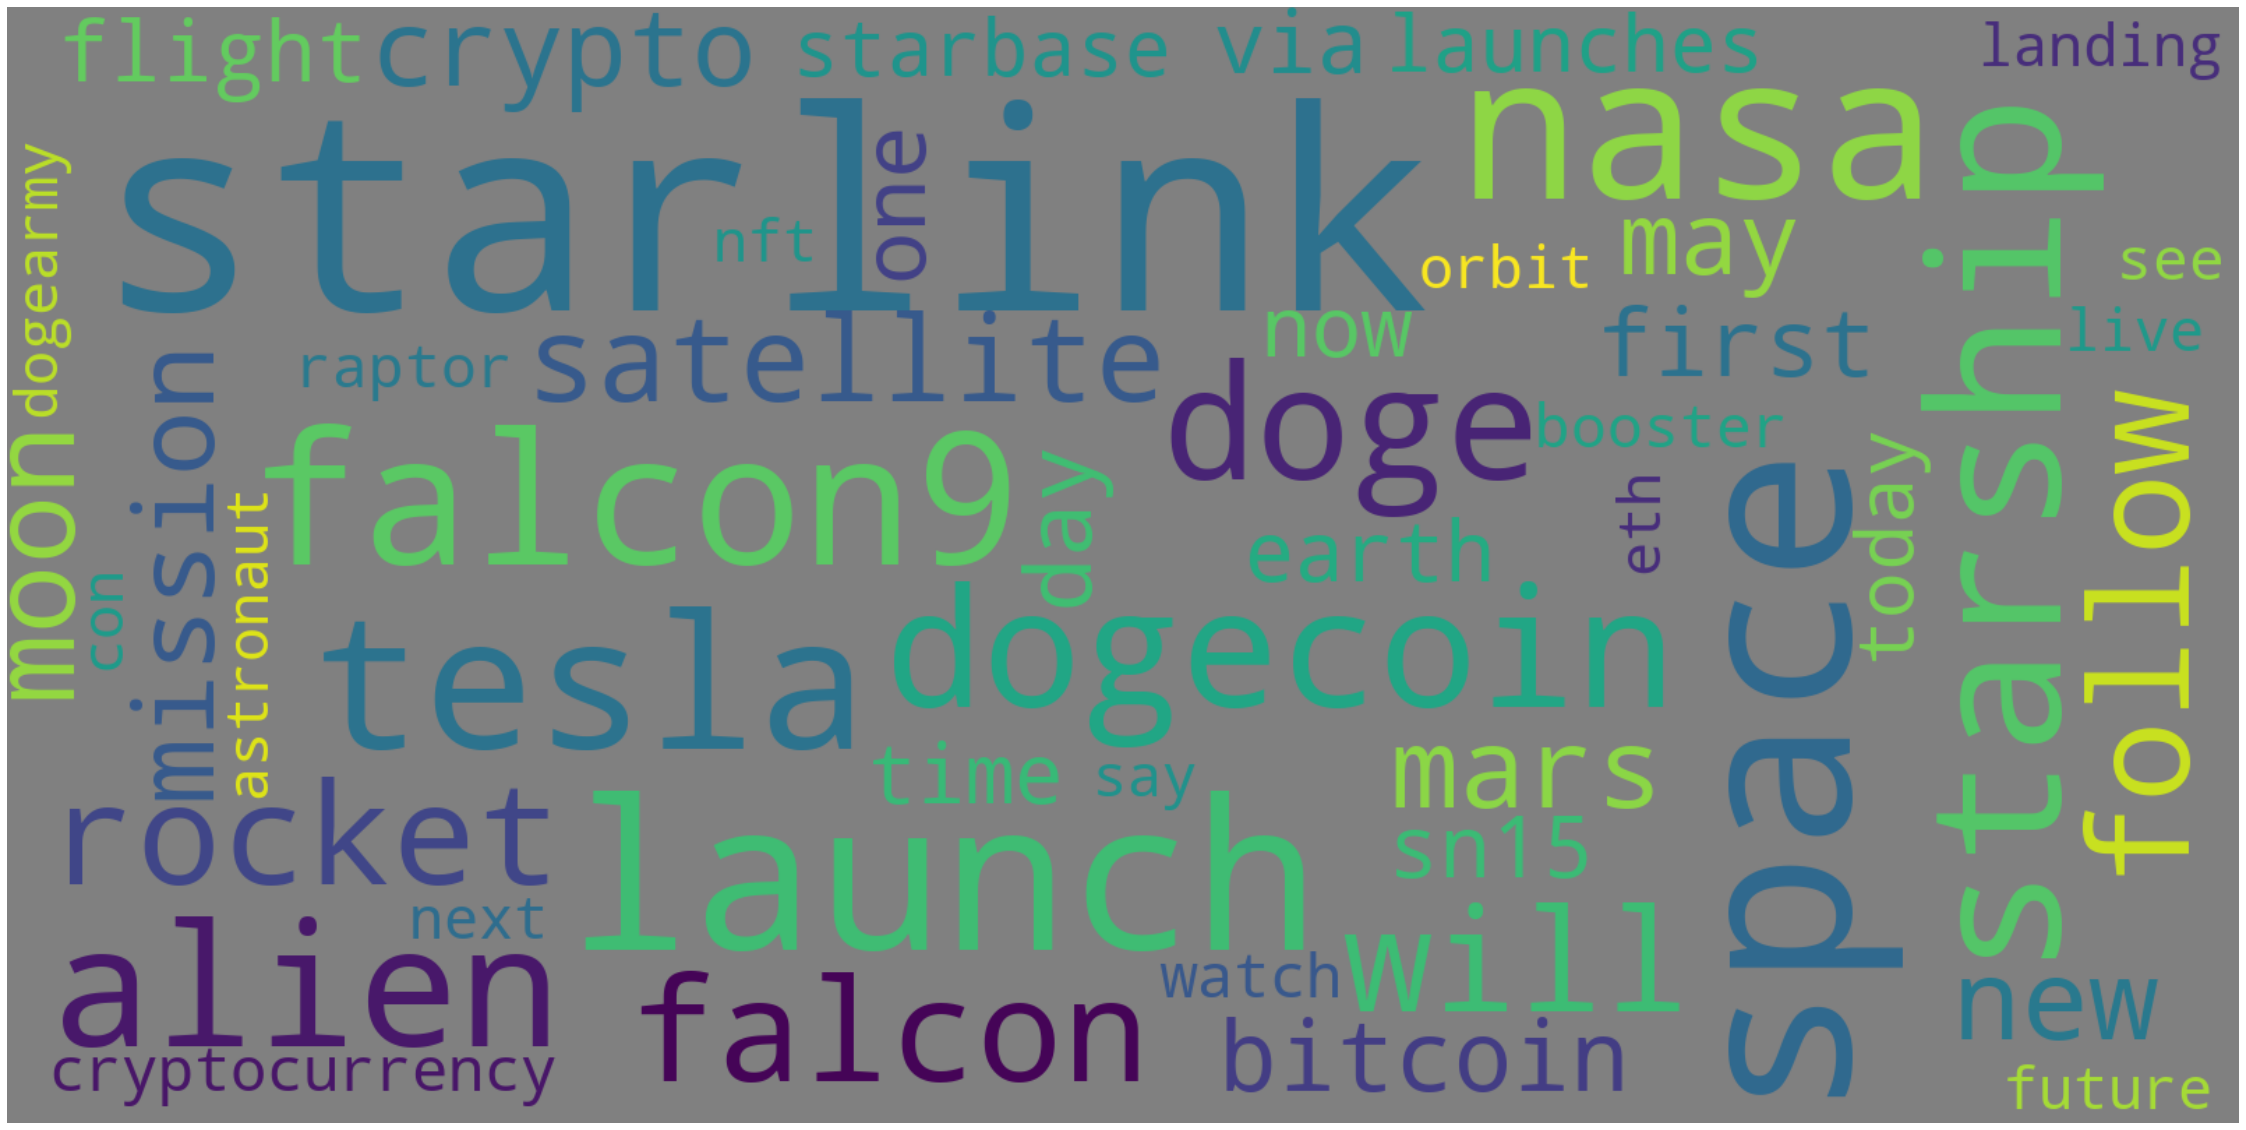

In [301]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='grey').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [287]:
import numpy as np
from PIL import Image

In [288]:
mask = np.array(Image.open('./stevejobs.jpg'))

In [297]:
wordcloud = WordCloud(width=1600, mask = mask,stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False,background_color='black').generate(string)

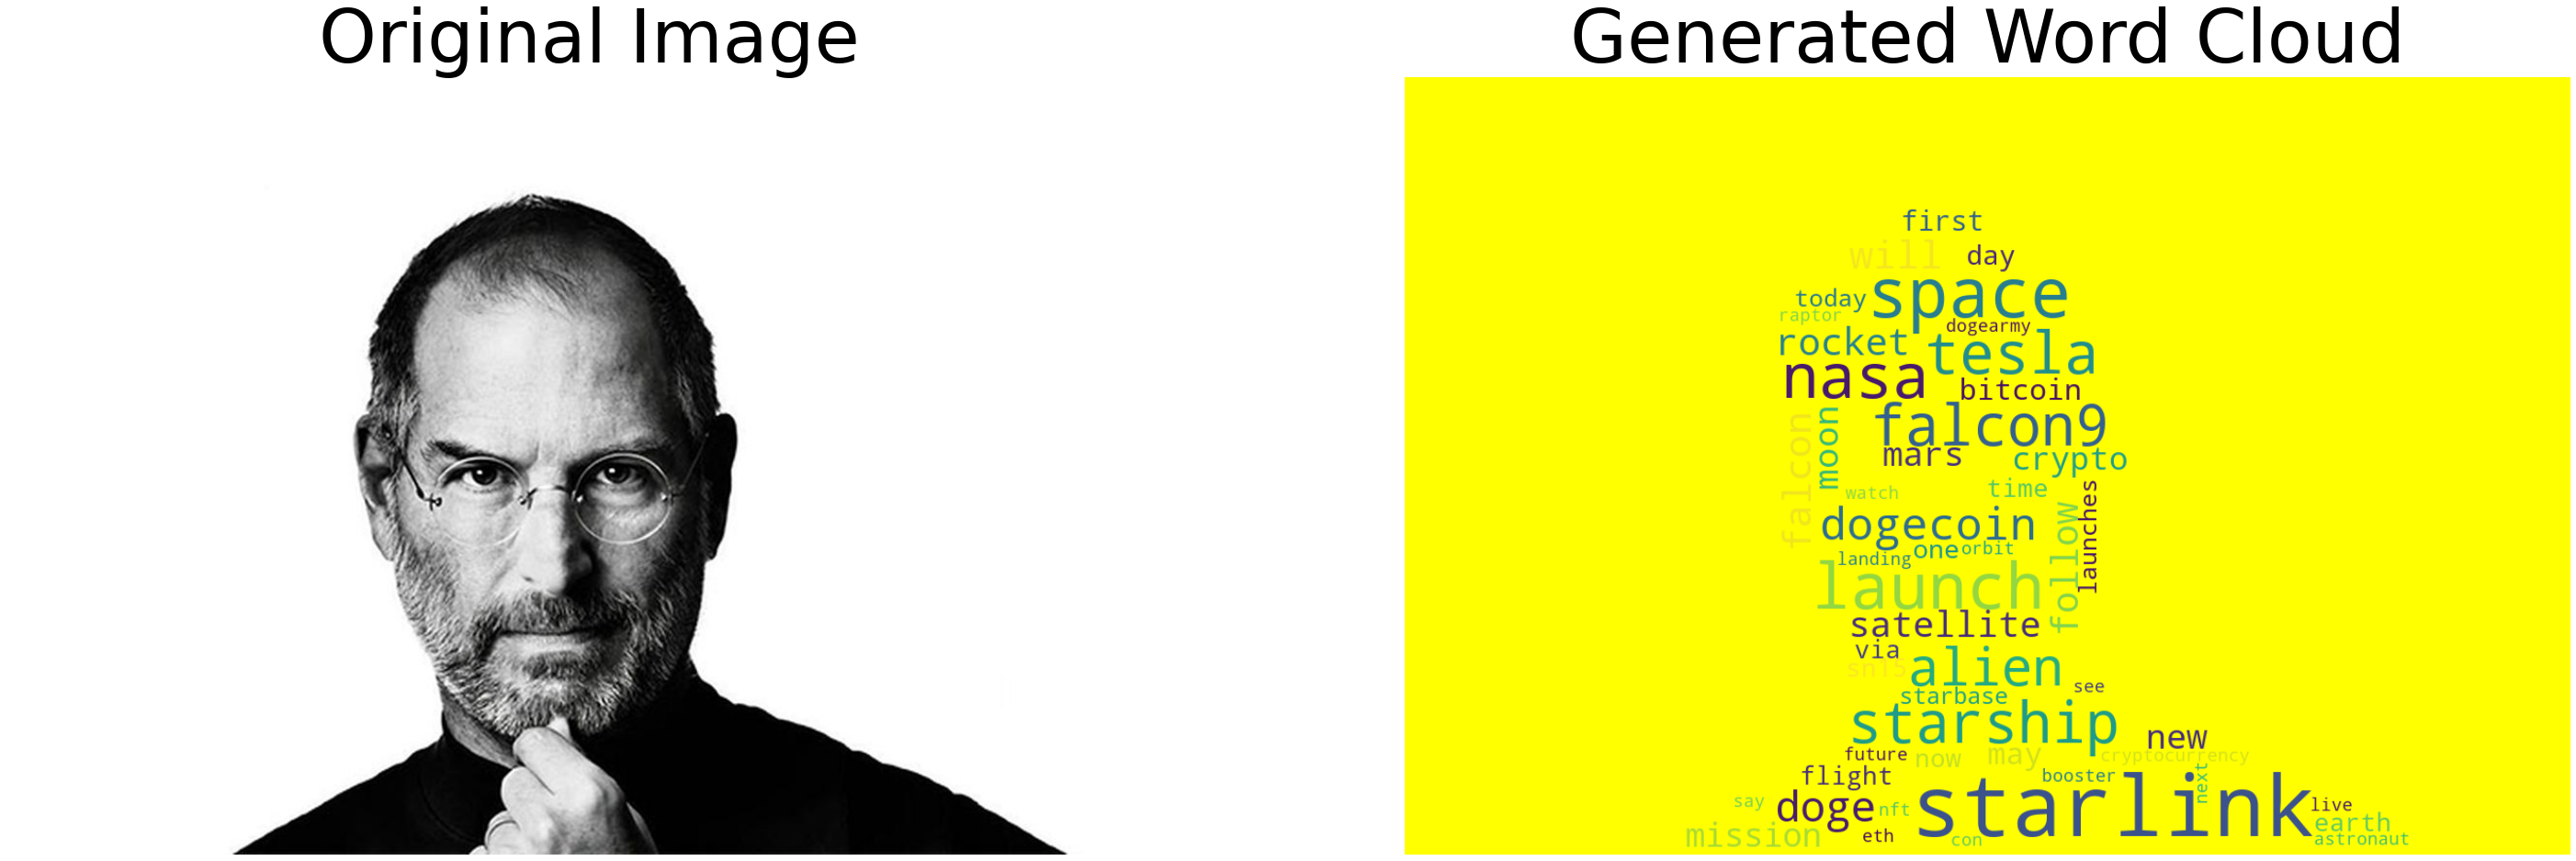

In [290]:
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Original Image', size=80)
plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Generated Word Cloud', size=80)
plt.axis("off")
plt.show()